# SVM-4 Categories

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report

In [13]:
ai_data = pd.read_csv('../data/AI_generated/AI_written_10000.csv')
human_data = pd.read_csv('../data/Real_Code/code_data.csv')

In [15]:
ai_data['source'] = 'AI'
human_data['source'] = 'Human'
data = pd.concat([
    ai_data[['Number of Lines', 'Code', 'source']],
    human_data[['Number of Lines', 'Code', 'source']].rename(columns={'code': 'source code'})
])

In [16]:
bins = [0, 70, 300, 700, float('inf')]
labels = ['0-70', '70-300', '300-700', '>700']
data['category'] = pd.cut(data['Number of Lines'], bins=bins, labels=labels, right=False)


In [17]:
data['code_length'] = data['Code'].apply(len)

In [19]:
results = []
for category in labels:
    subset = data[data['category'] == category]
    X = subset[['code_length']]  
    y = (subset['source'] == 'AI').astype(int)  

    if len(y.unique()) > 1:
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

    
        model = svm.SVC(kernel='rbf', C=1.0, gamma='scale')
        model.fit(X_train_scaled, y_train)

    
        predictions = model.predict(X_test_scaled)
        report = classification_report(y_test, predictions, output_dict=True)
        results.append((category, report['accuracy'], report['macro avg']['f1-score']))
    else:
        results.append((category, None, None))
        print(f"Category {category} does not have enough class representation.")

Category >700 does not have enough class representation.


/Users/swagyangjh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/swagyangjh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/swagyangjh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
for result in results:
    if result[1] is not None:
        print(f"Category: {result[0]}, Accuracy: {result[1]:.2f}, F1-Score: {result[2]:.2f}")
    else:
        print(f"Category: {result[0]} lacks sufficient data for training.")

Category: 0-70, Accuracy: 0.68, F1-Score: 0.67
Category: 70-300, Accuracy: 0.71, F1-Score: 0.67
Category: 300-700, Accuracy: 0.96, F1-Score: 0.49
Category: >700 lacks sufficient data for training.


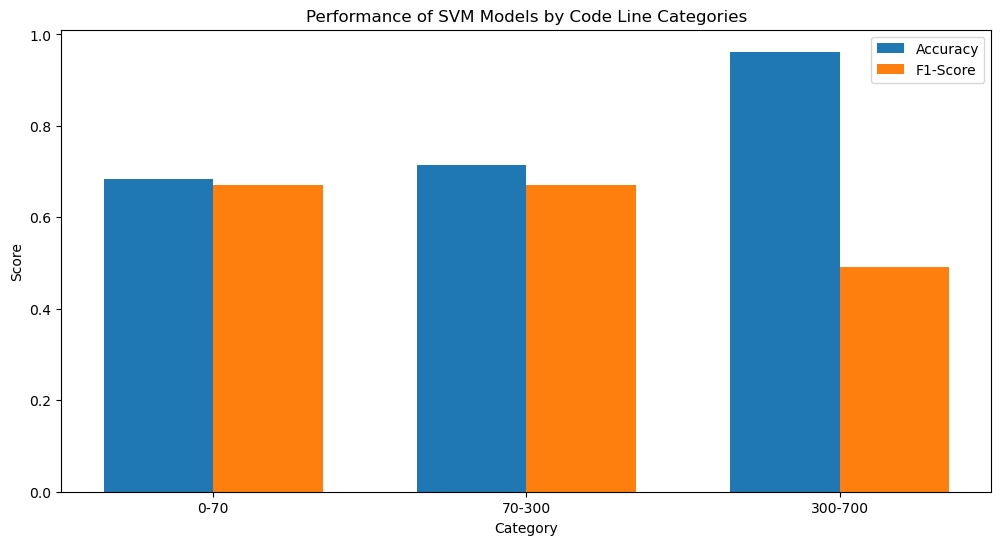

In [21]:
import matplotlib.pyplot as plt

filtered_results = [result for result in results if result[1] is not None]

# category
categories = [result[0] for result in filtered_results]
# accuracy
accuracies = [result[1] for result in filtered_results]
# F1 score
f1_scores = [result[2] for result in filtered_results]

plt.figure(figsize=(12, 6))
x = range(len(categories))  
width = 0.35  

plt.bar(x, accuracies, width, label='Accuracy')
plt.bar([p + width for p in x], f1_scores, width, label='F1-Score')

plt.xlabel('Category')
plt.ylabel('Score')
plt.title('Performance of SVM Models by Code Line Categories')
plt.xticks([p + width / 2 for p in x], categories)  

plt.legend()

plt.show()


In [26]:
results = []
for category in labels:
    subset = data[data['category'] == category]
    X = subset[['code_length']]  
    y = (subset['source'] == 'AI').astype(int)  


    if len(y.unique()) > 1:

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)


        model = svm.SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
        model.fit(X_train_scaled, y_train)


        predictions = model.predict(X_test_scaled)
        probas = model.predict_proba(X_test_scaled)[:, 1]  
        auc_score = roc_auc_score(y_test, probas)
        report = classification_report(y_test, predictions, output_dict=True)
        results.append((category, report['accuracy'], report['macro avg']['f1-score'], auc_score))
    else:
        results.append((category, None, None, None))  


/Users/swagyangjh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/swagyangjh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/swagyangjh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
categories = [result[0] for result in filtered_results]
accuracies = [result[1] for result in filtered_results]
f1_scores = [result[2] for result in filtered_results]
auc_scores = [result[3] for result in filtered_results]
print("Categories:")
print(categories)


print("\nAccuracies:")
print(accuracies)


print("\nF1 Scores:")
print(f1_scores)


print("\nAUC Scores:")
print(auc_scores)

Categories:
['0-70', '70-300', '300-700']

Accuracies:
[0.6833885470894463, 0.7147258163894024, 0.9622641509433962]

F1 Scores:
[0.6698425933386818, 0.6706039075208665, 0.49038461538461536]

AUC Scores:
[0.7366191124811814, 0.7172898001648318, 0.6612200435729847]


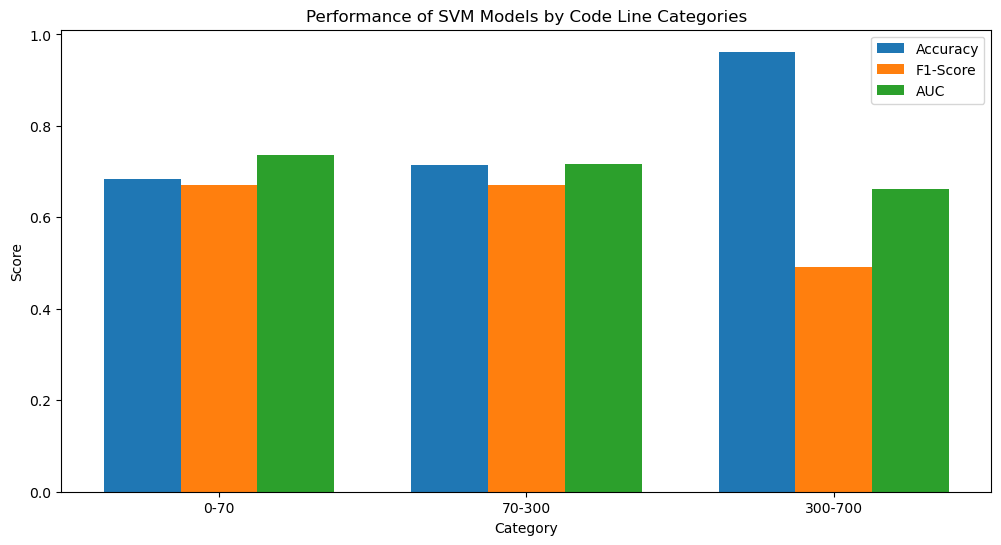

In [30]:
plt.figure(figsize=(12, 6))
width = 0.25  
x = range(len(categories)) 
plt.bar(x, accuracies, width, label='Accuracy')
plt.bar([p + width for p in x], f1_scores, width, label='F1-Score')
plt.bar([p + 2*width for p in x], auc_scores, width, label='AUC')

plt.xlabel('Category')
plt.ylabel('Score')
plt.title('Performance of SVM Models by Code Line Categories')
plt.xticks([p + width for p in x], categories)
plt.legend()


plt.show()

In [31]:
hyperparameters = model.get_params()
print("SVM Model Hyperparameters:")
print(hyperparameters)

SVM Model Hyperparameters:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [32]:
from sklearn import svm
from pprint import pprint

In [33]:
print("SVM Model Hyperparameters:")
pprint(model.get_params())

SVM Model Hyperparameters:
{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}
